<a href="https://colab.research.google.com/github/nishi1612/CS306-Data-Analysis-and-Visualization/blob/master/201601408_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Question 1 and 2 : Plot and visualize the dataset and Fit the ellipse in the dataset by SVD method**

In [0]:
def fit_ellipse_by_svd(x,y,dat):
  plt.scatter(x,y)
  plt.xlabel('$x$')
  plt.ylabel('$y$')
  plt.title('Dataset ' + str(dat))
  plt.show()
  x = np.array(x)
  y = np.array(y)

  x_2 = x*x
  y_2 = y*y
  xy = x*y

  on = np.zeros(len(x)) + 1
  b = np.zeros(len(x))
  mat = np.column_stack((x_2,xy,y_2,x,y,on))
  U , s , V = np.linalg.svd(mat)
  index = np.argmin(abs(s))
  vt = np.transpose(V)
  x_new = vt[:,index]

  x_plt = np.linspace(np.min(x),np.max(x),300)
  y_plt = np.linspace(np.min(y),np.max(y),300)

  x_plt,y_plt = np.meshgrid(x_plt,y_plt)
  X = x_new[0]*x_plt*x_plt + x_new[1]*x_plt*y_plt + x_new[2]*y_plt*y_plt + x_new[3]*x_plt + x_new[4]*y_plt + x_new[5]

  plt.contour(x_plt,y_plt,X,levels=[0],colors='red')
  plt.scatter(x,y)
  plt.xlabel('$x$')
  plt.ylabel('$y$')
  plt.title('Ellipse fitting in ' + str(dat) + ' by SVD method')
  plt.show()
  
  rmse = 0
  for i in range(len(x)):
    rmse = rmse + (x_new[0]*x[i]*x[i] + x_new[1]*x[i]*y[i] + x_new[2]*y[i]*y[i] + x_new[3]*x[i] + x_new[4]*y[i] + x_new[5])**2
  rmse = rmse/len(x)
  rmse = math.sqrt(rmse)
  print("RMSE : " + str(rmse))

**Question 3 : Fit the ellipse by using eigen method**

In [0]:
def fit_ellipse_by_eigen(x,y,dat):
  x = np.array(x)
  y = np.array(y)
  # Constraint Matrix
  C = np.column_stack(([0,0,-2,0,0,0],[0,1,0,0,0,0],[-2,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]))
  
  x_2 = x*x
  y_2 = y*y
  xy = x*y
  on = np.zeros(len(x)) + 1
  mat = np.column_stack((x_2,xy,y_2,x,y,on))
  
  s = np.transpose(mat) @mat
  w,v = np.linalg.eig(np.linalg.inv(s) @C)
  index = np.argmax(abs(w))
  x_new = v[:,index]

  x_plt = np.linspace(np.min(x),np.max(x),300)
  y_plt = np.linspace(np.min(y),np.max(y),300)

  x_plt,y_plt = np.meshgrid(x_plt,y_plt)
  X = x_new[0]*x_plt*x_plt + x_new[1]*x_plt*y_plt + x_new[2]*y_plt*y_plt + x_new[3]*x_plt + x_new[4]*y_plt + x_new[5]

  plt.contour(x_plt,y_plt,X,levels=[0],colors='red')
  plt.scatter(x,y)
  plt.xlabel('$x$')
  plt.ylabel('$y$')
  plt.title('Ellipse fitting in ' + str(dat) + ' by using constraint matrix method (use of eigen value)')
  plt.show()
  
  rmse = 0
  for i in range(len(x)):
    rmse = rmse + (x_new[0]*x[i]*x[i] + x_new[1]*x[i]*y[i] + x_new[2]*y[i]*y[i] + x_new[3]*x[i] + x_new[4]*y[i] + x_new[5])**2
  rmse = rmse/len(x)
  rmse = math.sqrt(rmse)
  print("RMSE : " + str(rmse))

In [0]:
link = 'https://drive.google.com/open?id=1o-C2c7bakY0D5AFOJMZL1LRWk6Pr_HPH'

In [0]:
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ellipse-data.csv')  
df = pd.read_csv('ellipse-data.csv')

In [0]:
df.head(5)

,Unnamed: 0,xn,yn
0,1,2.761728,8.341394
1,2,2.848046,8.010918
2,3,2.390835,8.329794
3,4,1.646376,8.394768
4,5,1.958659,8.450117


In [0]:
x = df['xn'].values
y = df['yn'].values

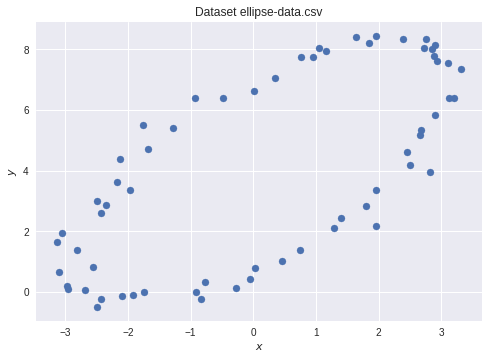

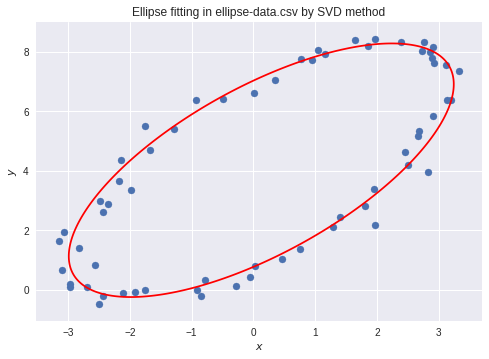

RMSE : 0.13784184591341836


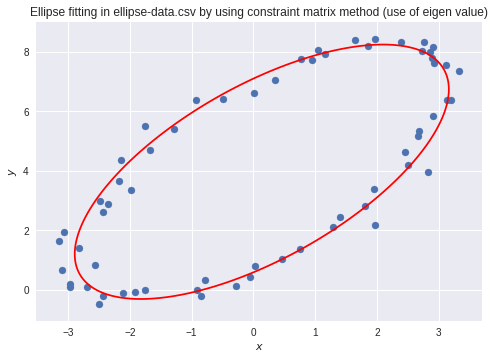

RMSE : 0.1465751186631088


In [0]:
fit_ellipse_by_svd(x,y,'ellipse-data.csv')
fit_ellipse_by_eigen(x,y,'ellipse-data.csv')

In [0]:
link = 'https://drive.google.com/open?id=1BksB_JNTUiTzMr8Vbuj0fNe7d-oKJda9'

In [0]:
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ellipse-data_large.csv')  
df = pd.read_csv('ellipse-data_large.csv')

In [0]:
df.head(5)

,Unnamed: 0,xn,yn
0,1,-5.212386,6.618791
1,2,-5.337657,6.512905
2,3,-5.682516,6.436210
3,4,-5.428777,6.073008
4,5,-5.353282,6.227031


In [0]:
x = df['xn'].values
y = df['yn'].values

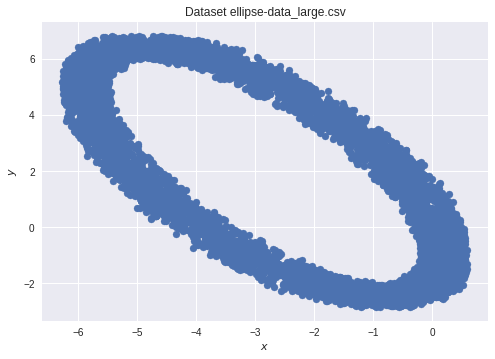

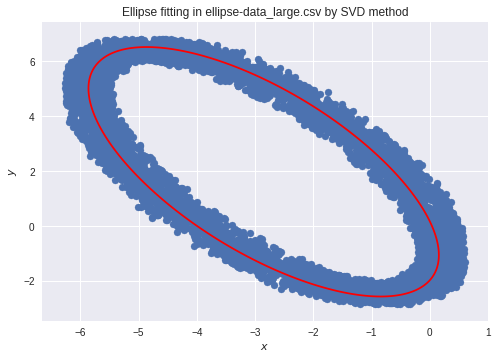

RMSE : 0.20956474089273144


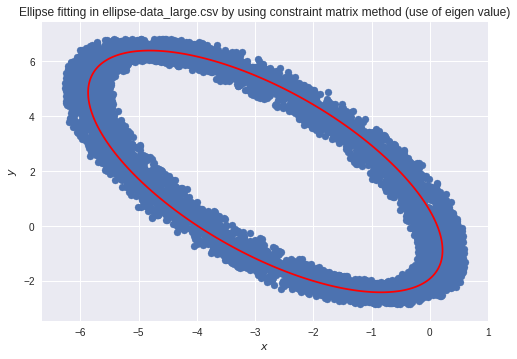

RMSE : 0.21744915203363516


In [0]:
fit_ellipse_by_svd(x,y,'ellipse-data_large.csv')
fit_ellipse_by_eigen(x,y,'ellipse-data_large.csv')